 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df_null = whale_returns_df.isnull().sum()
whale_returns_df_null

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df_null = algo_returns_df.isnull().sum()
algo_returns_df_null

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("./Resources/sp500_history.csv")
sp500_returns_df = pd.read_csv(sp500_history_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_returns_df.sort_index(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_returns_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
#Cleanse data by replacing $ symbols.
sp500_returns_df["Close"] = sp500_returns_df["Close"].str.replace("$", "")
sp500_returns_df["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [11]:
#Convert `Close` from `object` to `float`.
sp500_returns_df["Close"] = sp500_returns_df["Close"].astype("float")
sp500_returns_df["Close"]

sp500_returns_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_returns_df["Close"] = sp500_returns_df["Close"].pct_change()
sp500_returns_df["Close"]

Date
2012-10-01         NaN
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
                ...   
2019-04-16    0.000509
2019-04-17   -0.002274
2019-04-18    0.001579
2019-04-22    0.001012
2019-04-23    0.008841
Name: Close, Length: 1649, dtype: float64

In [13]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df.columns = ["S&P 500"]
sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

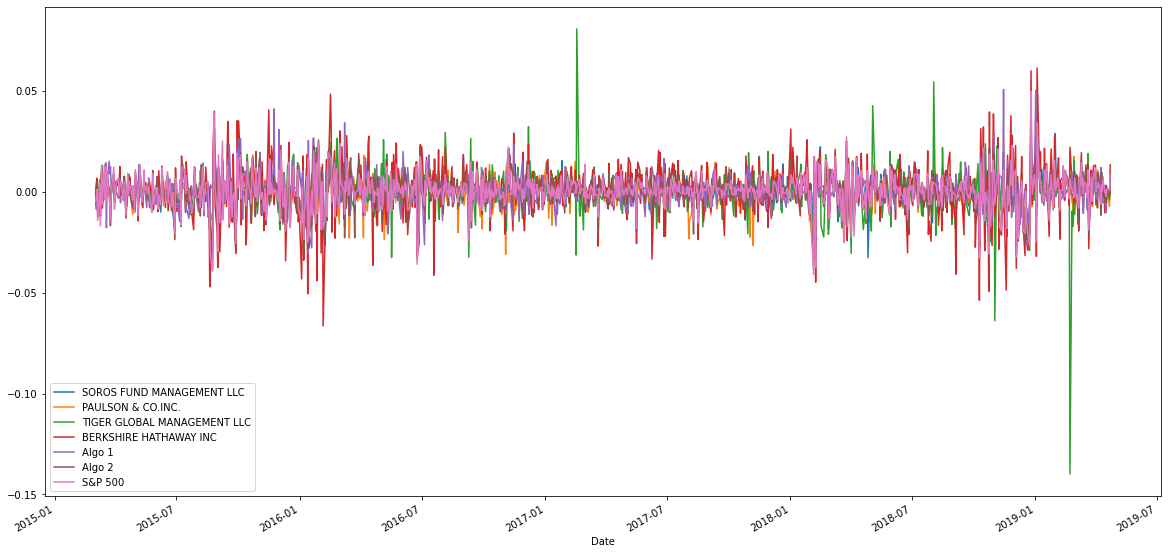

In [16]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

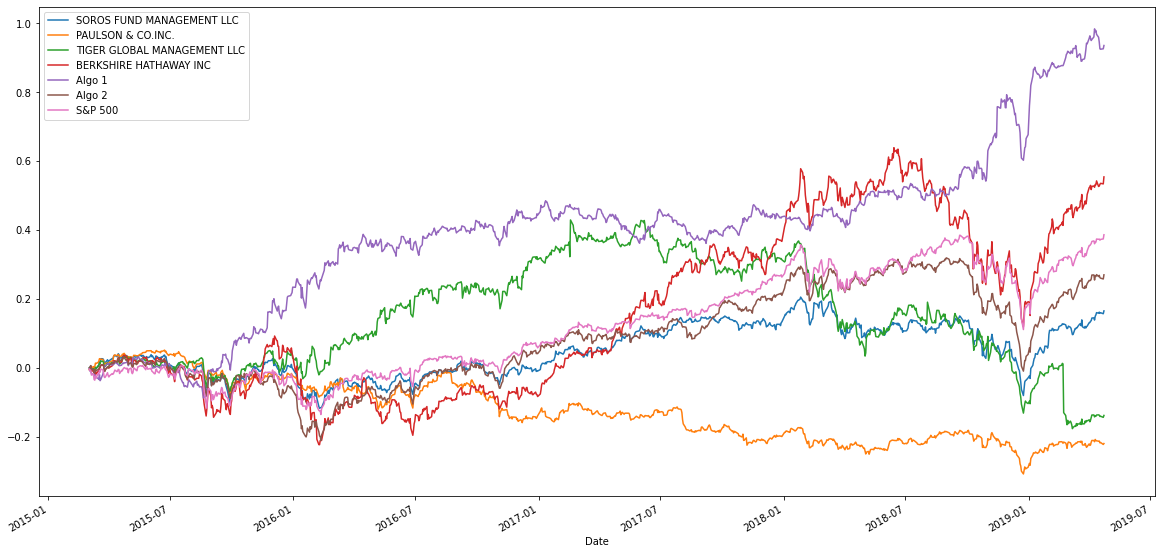

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod() - 1 

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

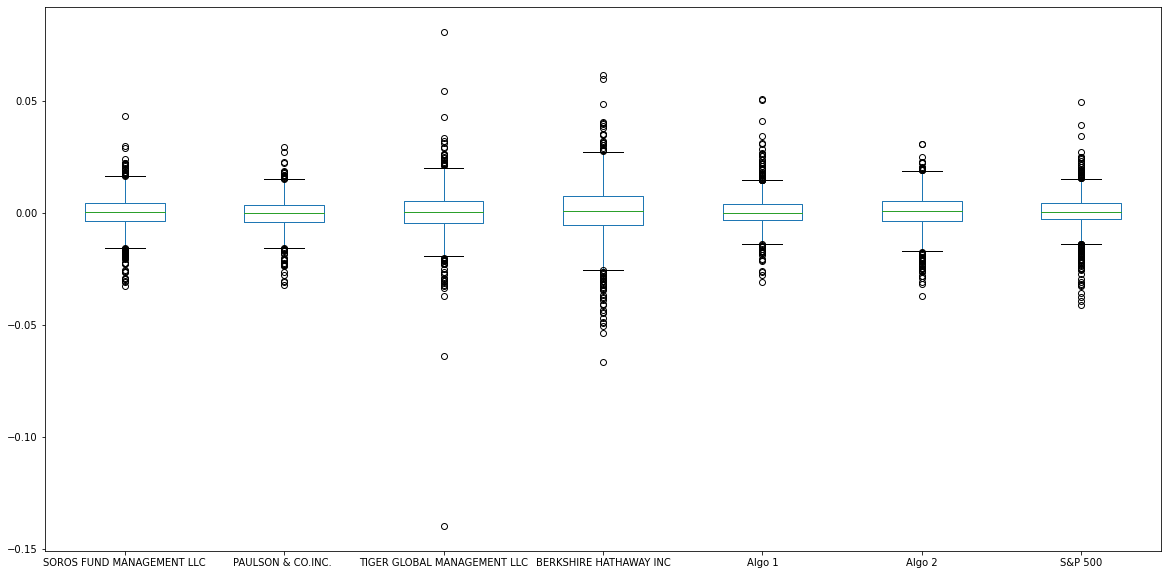

In [18]:
# Box plot to visually show risk
combined_returns_df.plot.box(figsize=(20, 10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
all_std_dev = combined_returns_df.std()
all_std_dev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate the daily standard deviation of S&P 500
sp500_std_dev = sp500_returns_df.std()
sp500_std_dev

S&P 500    0.008111
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P 500
riskier = all_std_dev[all_std_dev > all_std_dev["S&P 500"]]
riskier

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = all_std_dev * np.sqrt(252)
annualized_std_dev

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

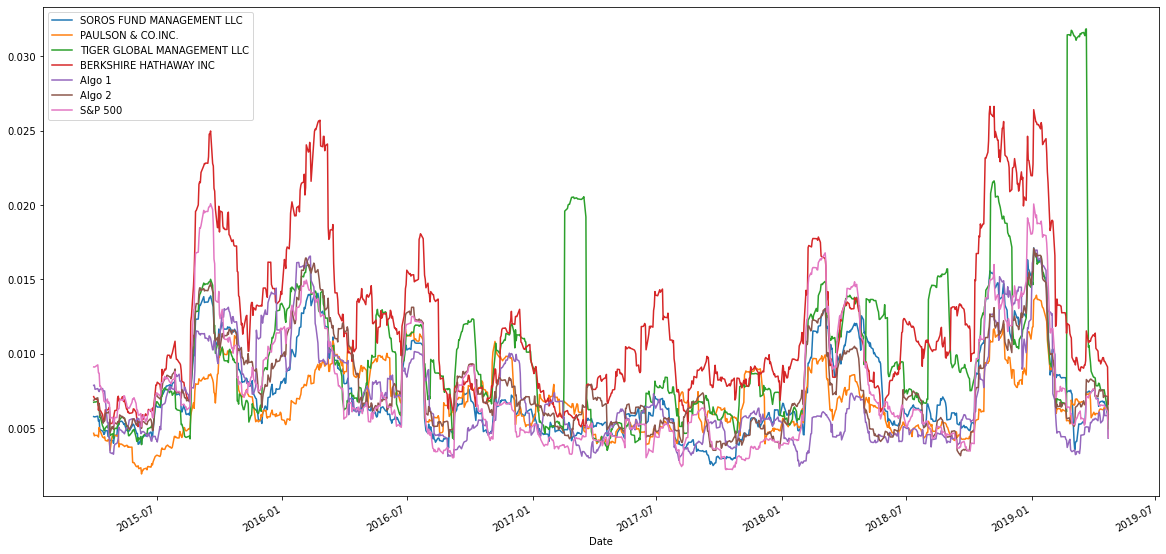

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling_std = combined_returns_df.rolling(window=21).std()
all_rolling_std
# Plot the rolling standard deviation
all_rolling_std.plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

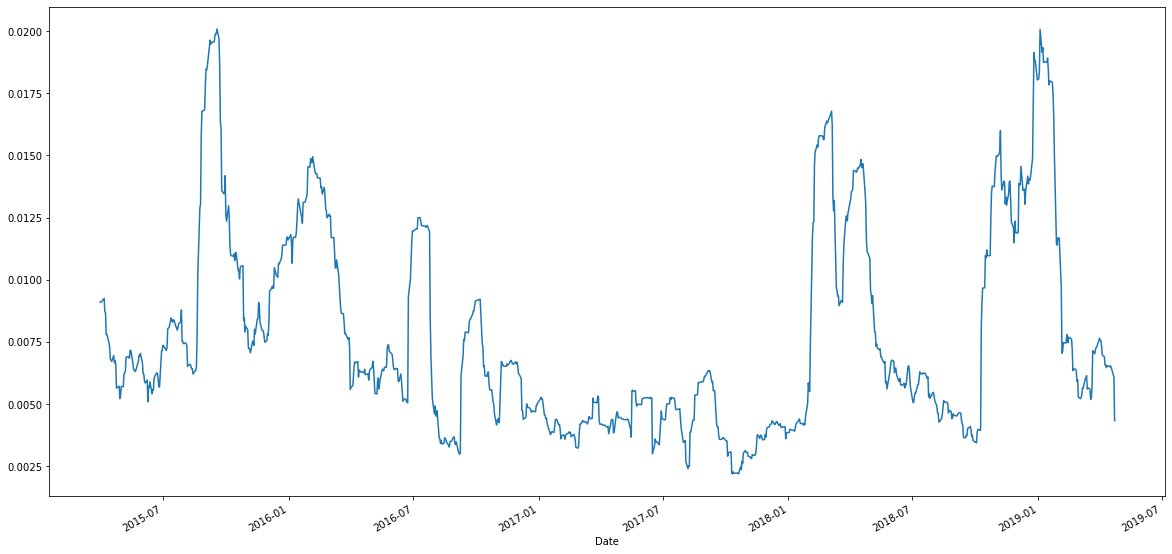

In [24]:
#Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window.
sp500_rolling_std = combined_returns_df['S&P 500'].rolling(window=21).std()
sp500_rolling_std.plot(figsize=(20, 10))

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation = combined_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

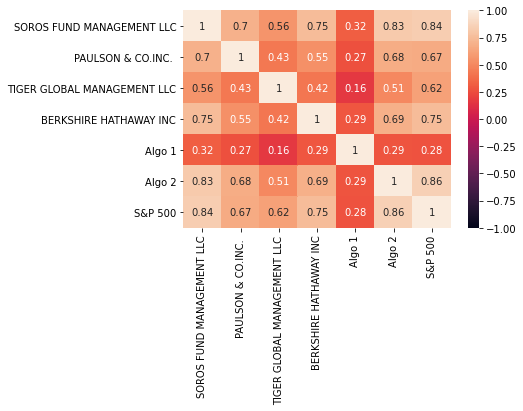

In [26]:
# Display the correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of ALGO 2 Returns vs.S&P 500 Returns'}, xlabel='Date'>

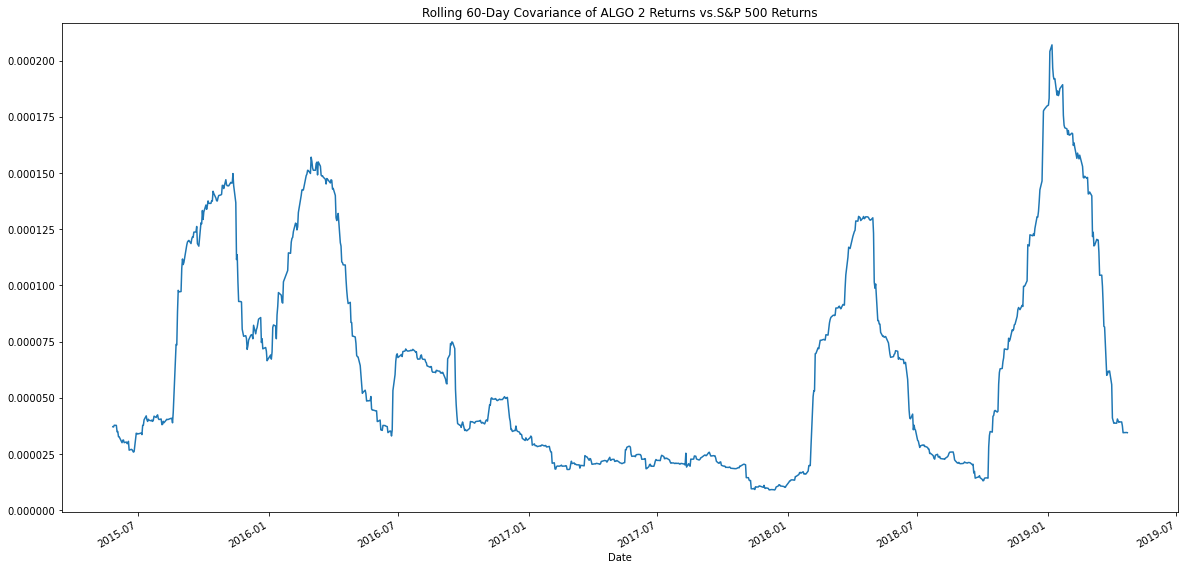

In [27]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_returns_df['Algo 2'].rolling(window=60).cov(combined_returns_df['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title="Rolling 60-Day Covariance of ALGO 2 Returns vs.S&P 500 Returns")

<AxesSubplot:title={'center':'Rolling 60-Day Variance of S&P 500 Returns'}, xlabel='Date'>

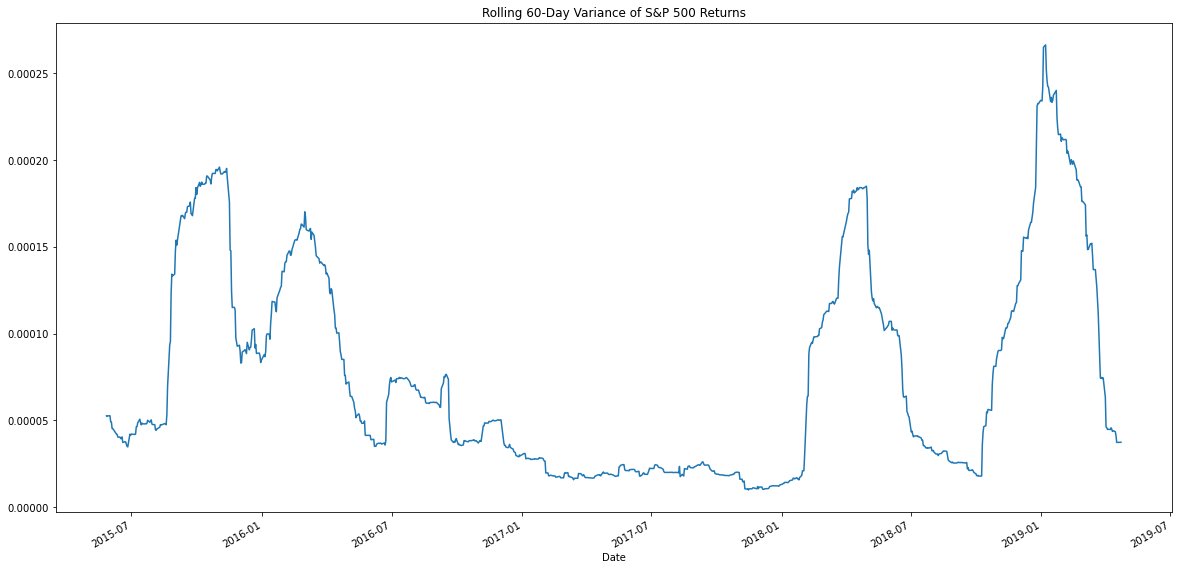

In [28]:
# Calculate variance of S&P 500
rolling_variance = combined_returns_df['S&P 500'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title="Rolling 60-Day Variance of S&P 500 Returns")

<AxesSubplot:title={'center':'Rolling 60-Day Beta of ALGO 2 Returns vs.S&P 500 Returns'}, xlabel='Date'>

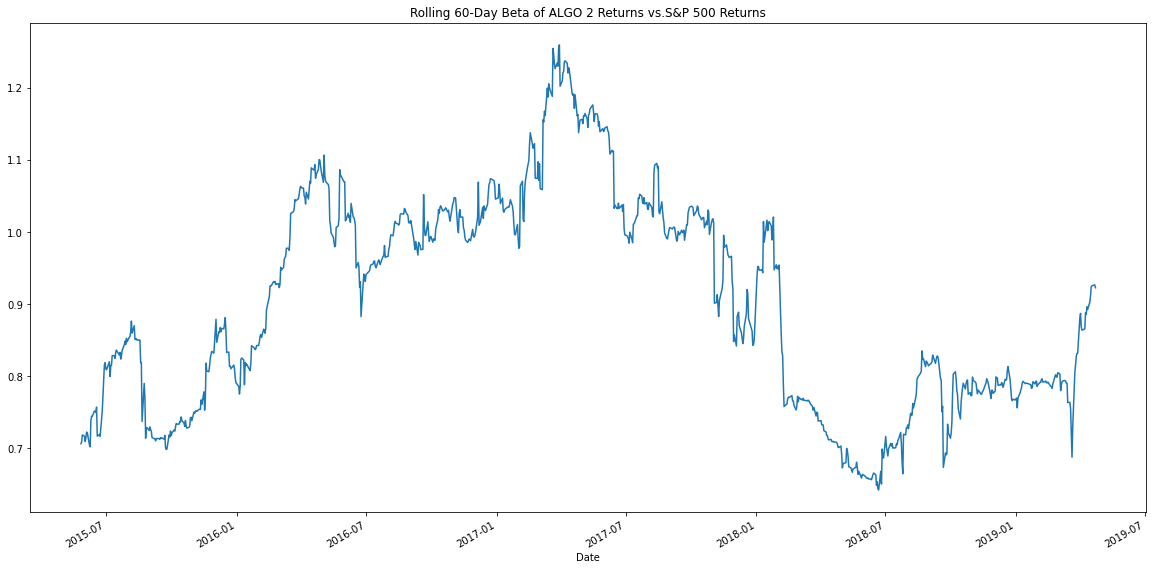

In [29]:
# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of ALGO 2 Returns vs.S&P 500 Returns")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [30]:
# Use `ewm` to calculate the rolling window
combined_returns_df['Algo 2'].ewm(halflife=21).std()

Date
2015-03-03         NaN
2015-03-04    0.002380
2015-03-05    0.002662
2015-03-06    0.007166
2015-03-09    0.006290
                ...   
2019-04-16    0.007938
2019-04-17    0.007896
2019-04-18    0.007779
2019-04-22    0.007670
2019-04-23    0.007701
Name: Algo 2, Length: 1043, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:>

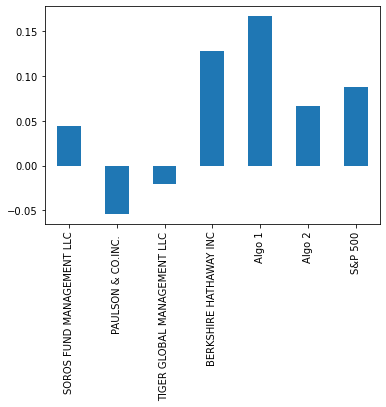

In [31]:
#Annualized Return
annualized_return = combined_returns_df.mean() * 252
annualized_return.plot(kind='bar')

<AxesSubplot:>

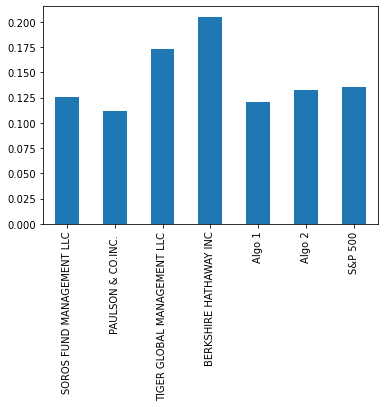

In [32]:
#Annualized Standard Deviation
annualized_std = combined_returns_df.std() * np.sqrt(252)
annualized_std.plot(kind='bar')

In [33]:
# Annualized Sharpe Ratios
sharpe_ratios = annualized_return / annualized_std
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

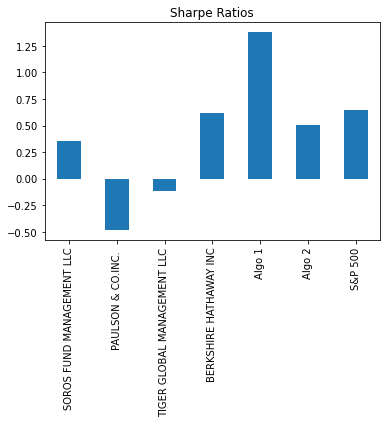

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on the above plots, we see that Algo 1 has the highest annualized return among all other portfolios. It also has the second lowest risk based on the annualized standard deviation.

Consequently, Algo 1 has the highest sharpe ratio as compared to the other portfolios. Hence, we can determine that Algo 1 clearly outperform both the market (S&P 500) and the whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [35]:
# Reading data from 1st stock
goog_path = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(inplace=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [36]:
# Reading data from 2nd stock
aapl_path = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_df.sort_index(inplace=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [37]:
# Reading data from 3rd stock
cost_path = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_df.sort_index(inplace=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [38]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog_df, aapl_df, cost_df], axis='rows', join='inner')
combined_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [39]:
# Reset Date index
combined_df = combined_df.reset_index()
combined_df

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59
...,...,...,...
745,2019-05-03,COST,244.62
746,2019-05-06,COST,244.23
747,2019-05-07,COST,240.18
748,2019-05-08,COST,241.34


In [40]:
# Reorganize portfolio data by having a column per symbol
combined_df = combined_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
combined_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [41]:
# Calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.name = "Custom Portfolio"
# Display sample data
portfolio_returns

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Name: Custom Portfolio, Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
new_combined_df = pd.concat([combined_returns_df, portfolio_returns], axis='columns', join='inner')
new_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined_df.dropna(inplace=True)
new_combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
annualized_std_dev_2 = new_combined_df.std() * np.sqrt(252)
annualized_std_dev_2

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom Portfolio               0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

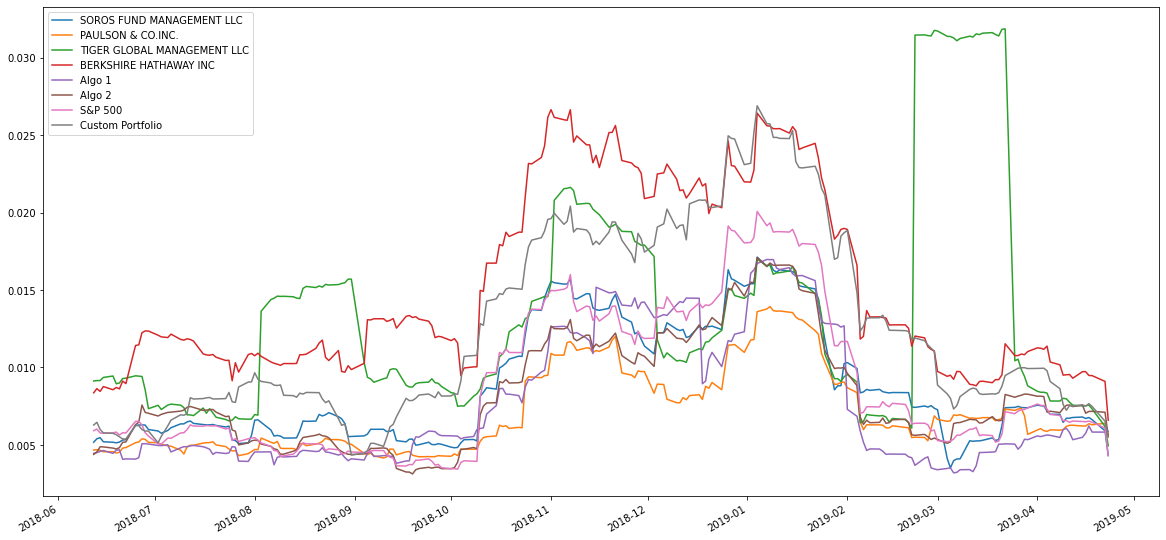

In [46]:
# Calculate rolling standard deviation
rolling_std_dev = new_combined_df.rolling(window=21).std()
rolling_std_dev
# Plot rolling standard deviation
rolling_std_dev.plot(figsize=(20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

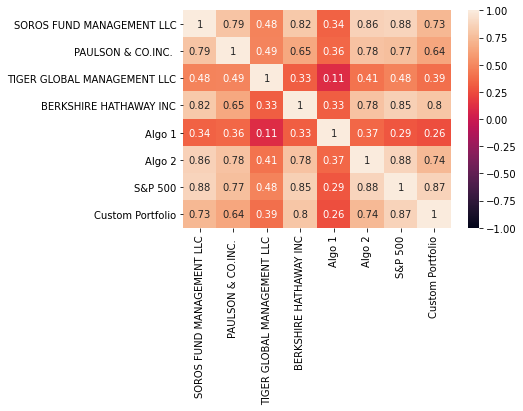

In [47]:
# Calculate and plot the correlation
correlation_2 = new_combined_df.corr()
sns.heatmap(correlation_2, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio vs.S&P 500'}>

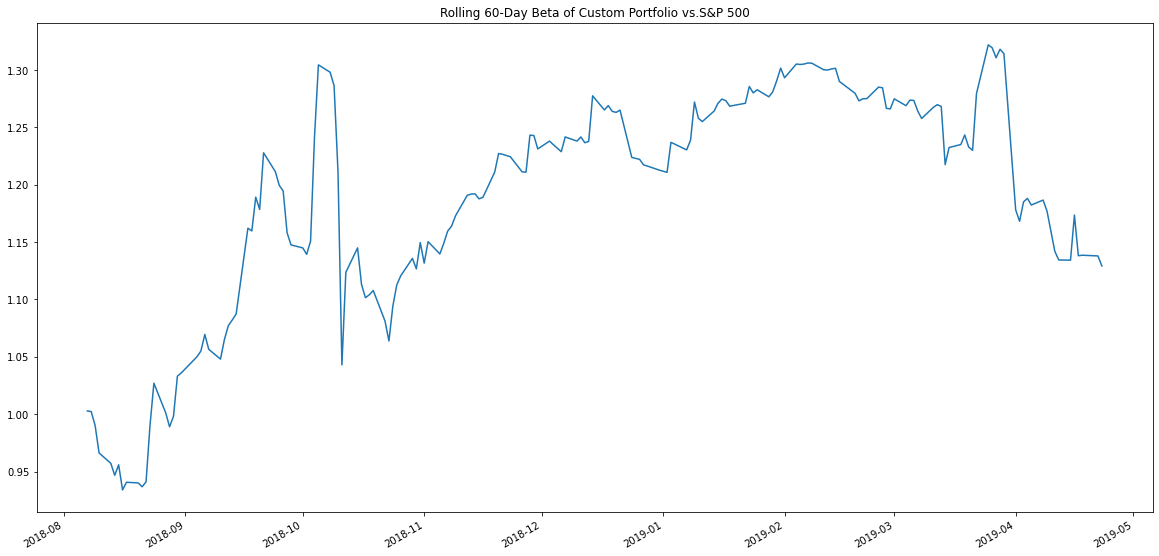

In [48]:
# Calculate and plot Beta
rolling_cov = new_combined_df['Custom Portfolio'].rolling(window=60).cov(new_combined_df['S&P 500'])
rolling_var = new_combined_df['S&P 500'].rolling(window=60).var()
rolling_beta_2 = rolling_cov / rolling_var
rolling_beta_2.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Custom Portfolio vs.S&P 500")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualzied Sharpe Ratios
d = new_combined_df
annu_sharpe_ratios = (d.mean() * 252) / (d.std() * np.sqrt(252))
annu_sharpe_ratios.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -1.034216
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
PAULSON & CO.INC.              0.258738
SOROS FUND MANAGEMENT LLC      0.430713
S&P 500                        0.584820
Custom Portfolio               0.933123
Algo 1                         2.035665
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

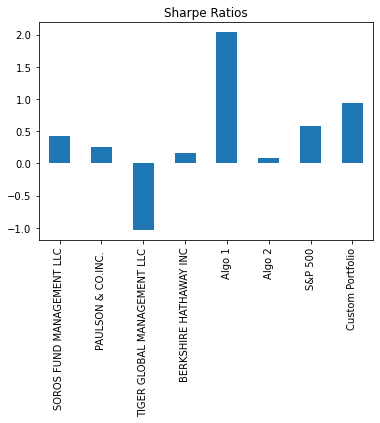

In [50]:
# Visualize the sharpe ratios as a bar plot
annu_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### How does your portfolio do? 

Based on the sharpe ratio, custom portfolio has the second highest sharpe ratio among all the portfolios. Hence, it indicates that custom portfolio is performing better than every other portfolios except Algo 1.